<IPython.core.display.Javascript object>


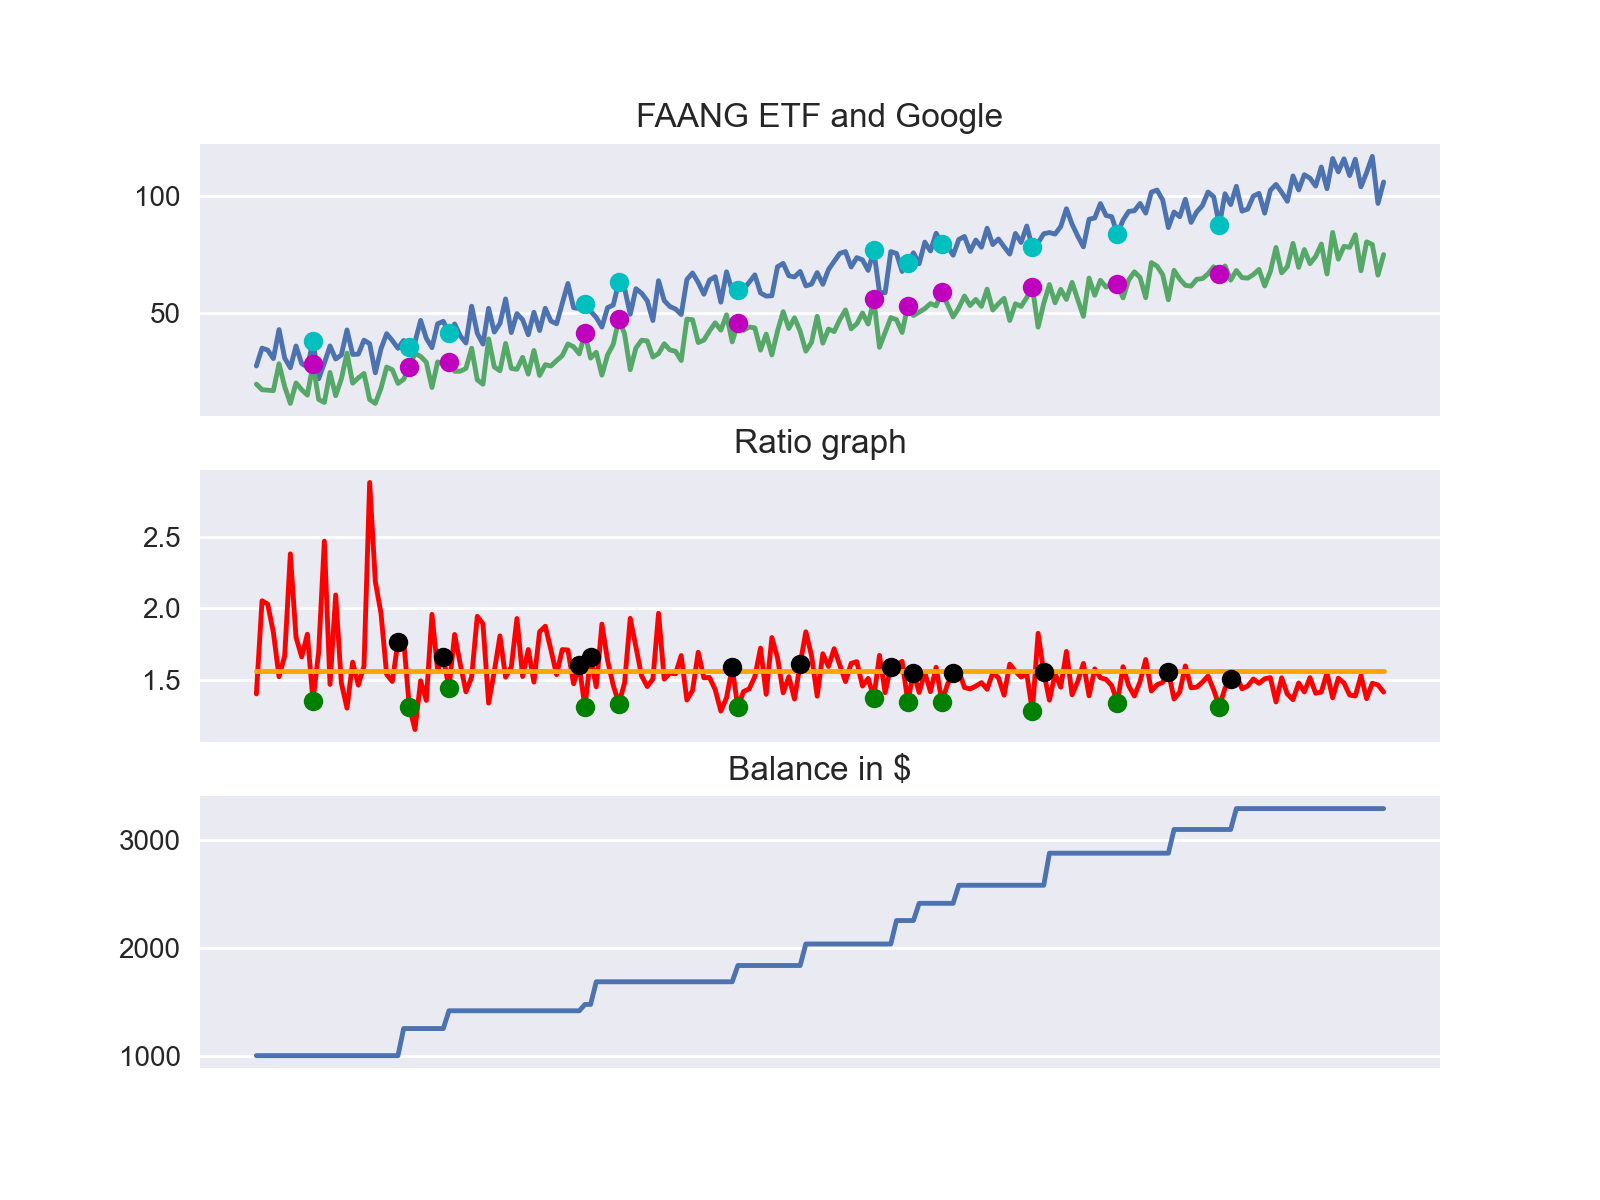

In [1]:
%matplotlib notebook

import random
import numpy as np
import math
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from statistics import stdev

plt.style.use('seaborn')
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 6))

balance, x, y_fang, y_google = [], [], [], []
longA, longB, trades, closes = [], [], [], []

global position 
position = 'closed'

def build_stocks(corr, mu, sigma, points):
    '''
    Builds two stocks with correlation corr by using two independent
    normal variables of mean mu and standard deviation sigma) 
    '''
    
    s2 = np.random.normal(mu, sigma, points)

    
    
    #Google stock, say, is centered at 15 but given a slight upward trend
    s = 15 + np.random.normal(mu, sigma, points) + 0.3*np.linspace(1, points, points)
    #FAANG ETF, say, is centered at 16 but we add another normal to it and another slight upward trend
    ss = 16 + corr * s + math.sqrt(1 - corr**2) * s2 + 0.2*np.linspace(1, points, points)
    
    return (s, ss)

(s,ss) = build_stocks(0.7, 0, 5, 200)

def animation(i):
        global position
        global fang_price
        global fang_stock
        global google_stock
        global google_price
             
        x.append(i)
        y_fang.append(ss[i])
        y_google.append(s[i])
        
        if i < 10:
            balance.append(1000)
        if i >= 10:
            curr_mean = np.mean(np.array(y_fang)/np.array(y_google))
            curr_stdev = np.std(np.array(y_fang)/np.array(y_google))

            ax1.clear()
            ax1.plot(x, y_fang)
            ax1.plot(x, y_google)
            ax1.title.set_text("FAANG ETF and Google")
            ax1.set_xticks([])
            
            ax2.clear()
            ratio = np.array(y_fang)/np.array(y_google)
            ax2.plot(x, ratio, 'r')
            ax2.plot((0,x[i]+1), (curr_mean, curr_mean), color='orange')
            ax2.title.set_text("Ratio graph")
            ax2.set_xticks([])
            
                
            if position=='closed':
                
                if ratio[i] - curr_mean > 0.15 * curr_mean: # 15% away from the mean
                    longB.append(i)
                    trades.append(i)
                    position = 'short_long'
                    fang_stock = -(balance[len(balance)-1]/2)/y_fang[i]
                    fang_price = y_fang[i]
                    google_stock = (balance[len(balance)-1]/2)/y_google[i]
                    google_price = y_google[i]
                    #ax2.plot(x[i], ratio[i], 'ko')
                    #ax1.plot(x[i], y_fang[i], 'co')
                    #ax1.plot(x[i], y_google[i], 'mo')
                    balance.append(balance[len(balance)-1])
                
                elif curr_mean - ratio[i] > 0.15 * curr_mean: # 15% away from the mean
                    longA.append(i)
                    trades.append(i)
                    position = 'long_short'
                    fang_stock = (balance[len(balance)-1]/2)/y_fang[len(y_fang)-1]
                    fang_price = y_fang[i]
                    google_stock = -(balance[len(balance)-1]/2)/y_google[len(y_google)-1]
                    google_price = y_google[i]
                    ax2.plot(x[i], ratio[i], 'ko')
                    #ax1.plot(x[i], y_fang[i], 'mo')
                    #ax1.plot(x[i], y_google[i], 'co')
                    balance.append(balance[len(balance)-1])
                else:
                    balance.append(balance[len(balance)-1])
            
            elif position == 'short_long':
                # greater than mean by at most 5%
                if abs(ratio[i] - curr_mean) < 0.05 * curr_mean and ratio[i] - curr_mean > 0: 
                    position = 'closed'
                    closes.append(i)
                    balance.append(balance[len(balance)-1] + fang_stock*(y_fang[i] - fang_price) + google_stock*(y_google[i] - google_price))
                else:
                    balance.append(balance[len(balance)-1])
                
            elif position == 'long_short':  
                # smaller than mean by at most 5%
                if abs(ratio[i] - curr_mean) < 0.05 * curr_mean and ratio[i] - curr_mean < 0:
                    position = 'closed'
                    closes.append(i)
                    balance.append(balance[len(balance)-1] + fang_stock*(y_fang[i] - fang_price) + google_stock*(y_google[i] - google_price))
                else:
                    balance.append(balance[len(balance)-1])
            
            for i in longB:
                ax1.plot(x[i], y_fang[i], 'mo')
                ax1.plot(x[i], y_google[i], 'co')
            for i in longA:
                ax1.plot(x[i], y_fang[i], 'co')
                ax1.plot(x[i], y_google[i], 'mo')
            for i in trades:
                ax2.plot(x[i], ratio[i], 'go')
            for i in closes:
                ax2.plot(x[i], ratio[i], 'ko')
            
            ax3.clear()
            ax3.plot(x, balance)
            ax3.title.set_text("Balance in $")
            ax3.set_xticks([])
            
animation = FuncAnimation(fig, func=animation, interval=1000)
plt.show()

